In [39]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [3]:
df = pd.read_csv('bankruptcydata.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# 1. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# Check for missing data
df_missing = df.isnull().sum()
print(df_missing)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [6]:
# Check for duplicates
duplicate = df.duplicated().sum()
print(duplicate)

0


In [7]:
# Check correlation with 'Baankrupt?'
corr = df.corrwith(df['Bankrupt?']).abs()
corr_sort = corr.sort_values(kind = 'quicksort', ascending = False)
corr_sort.dropna(inplace = True)
print(corr_sort.head(20))

Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
 Net worth/Assets                                           0.250161
 Debt ratio %                                               0.250161
 Persistent EPS in the Last Four Seasons                    0.219560
 Retained Earnings to Total Assets                          0.217779
 Net profit before tax/Paid-in capital                      0.207857
 Per Share Net profit before tax (Yuan ¥)                   0.201395
 Current Liability to Assets                                0.194494
 Working Capital to Total Assets                            0.193083
 Net Income to Stockholder's Equity                         0.180987
 Borrowing dependency             

In [8]:
# Check what 'Bankrupt?' looks like
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

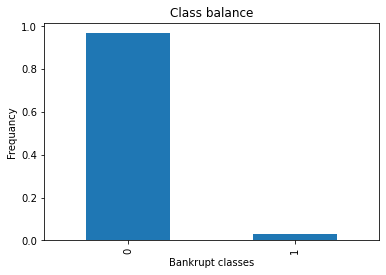

In [10]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

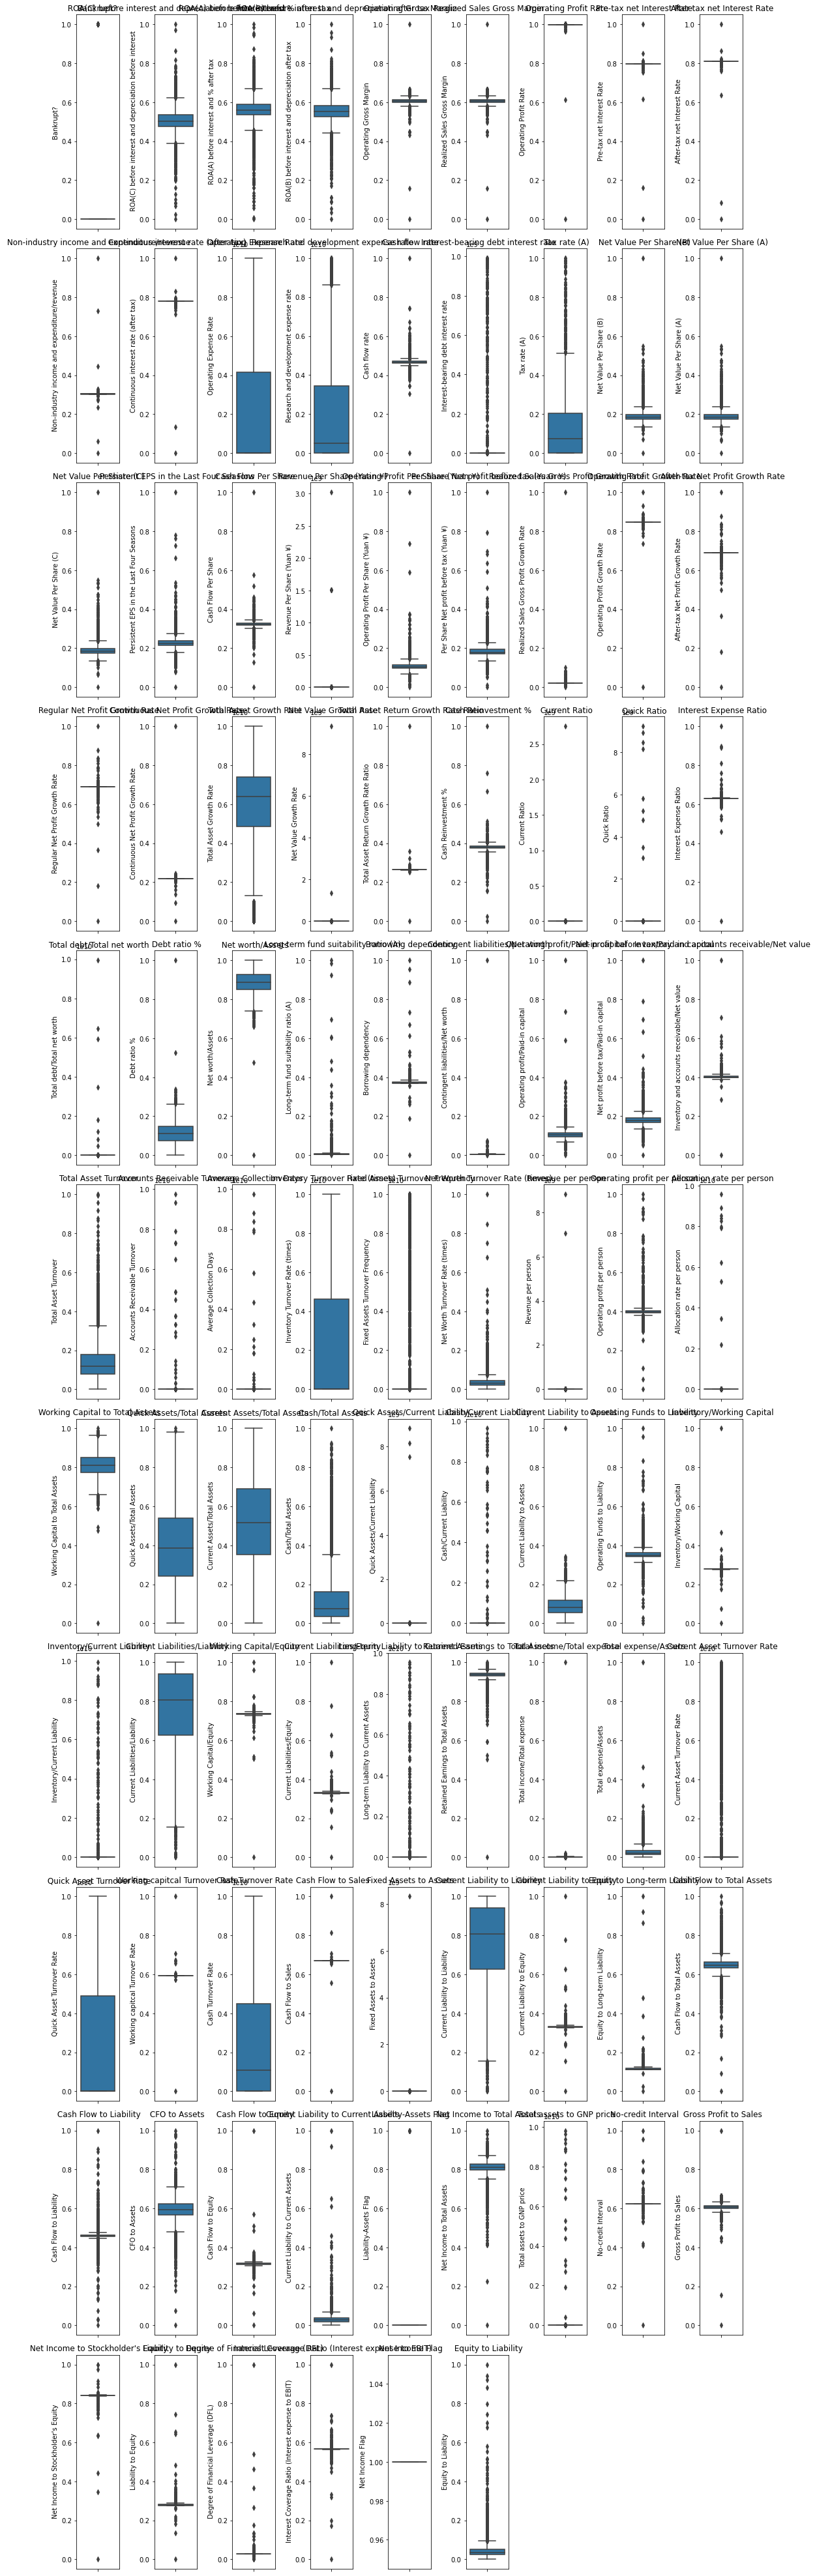

In [9]:
# Visualize the outliers in each variable
num_columns = len(df.columns)

grid_rows = math.ceil(num_columns / 9)  
plt.figure(figsize=(15, 5 * grid_rows))

for i, column in enumerate(df.columns, 1):
    plt.subplot(grid_rows, 9, i)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

# 2. Data Processing
   

### Split the data

In [11]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Handling imbalanced data

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# 3. Models

## 3.1 Random Forest

In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_val)
print("Classification Report for Random Forest:")
print(classification_report(y_val, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.41      0.55      0.47        51

    accuracy                           0.95      1364
   macro avg       0.69      0.76      0.72      1364
weighted avg       0.96      0.95      0.96      1364



### Hyperparameter Tuning #1

In [26]:
# hyperparameter tuning V1

#Parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # list of values for n_estimators
    'max_features': [5, 10, 20, 'sqrt', 'log2'],  # list of values for max_features
    'max_depth': [None, 10, 20, 30, 40, 50],  # list of values for max_depth
    'criterion': ['entropy', 'gini']  # list of values for criterion
}

f1_scorer = make_scorer(f1_score, average='macro')

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring=f1_scorer, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_resampled, y_resampled)



Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [5, 10, 20, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

In [28]:
# Print optimal parameterss and F1-score
print("Best Parameters:")
print(grid_search_rf.best_params_)
print("Best Cross-validated F1-score:")
print(grid_search_rf.best_score_)

Best Parameters:
{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Best Cross-validated F1-score:
0.9815503498772339


In [29]:
y_pred_best_rf = grid_search_rf.best_estimator_.predict(X_val)
print("Classification Report for Best Random Forest on Validation Set:")
print(classification_report(y_val, y_pred_best_rf))

Classification Report for Best Random Forest on Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.41      0.55      0.47        51

    accuracy                           0.95      1364
   macro avg       0.69      0.76      0.72      1364
weighted avg       0.96      0.95      0.96      1364



There were no differences in the classification reports between the original random forest model and the tuned randome forest model

### Hyperparameter Tuning V2
Because of the lack of differences from the previous model, I added more paramters to hopefully better capture a model. 

In [30]:
#Expanded parameter gridd
param_grid_expanded = {
    'n_estimators': [50, 100, 200, 500],  
    'max_features': ['auto', 'sqrt', 'log2', 0.2, 0.5], 
    'max_depth': [None, 5, 10, 20, 30, 50, 70],  
    'criterion': ['entropy', 'gini'],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}
grid_search_rf_expanded = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_expanded, cv=5, scoring=f1_scorer, verbose=2, n_jobs=-1)
grid_search_rf_expanded.fit(X_resampled, y_resampled)

#Print optimal parameters
print("Best Parameters:")
print(grid_search_rf_expanded.best_params_)
print("Best Cross-validated F1-score:")
print(grid_search_rf_expanded.best_score_)

Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


KeyboardInterrupt: 

Unfortunately, was unable to run this test on all fits using my personal device, will attempt to find a work around such as using a different program or the school's virtual desktop. 

In [ ]:
# Tuned model 2
y_pred_best_rf_expanded = grid_search_rf_expanded.best_estimator_.predict(X_val)
print("Classification Report for Best Random Forest on Validation Set with Expanded Grid:")
print(classification_report(y_val, y_pred_best_rf_expanded))

## 3.2 Gradient Boosted Trees

In [31]:
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_resampled, y_resampled)
y_pred_gbt = gbt.predict(X_val)
print("Classification Report for Gradient Boosted Trees:")
print(classification_report(y_val, y_pred_gbt))

Classification Report for Gradient Boosted Trees:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.34      0.65      0.44        51

    accuracy                           0.94      1364
   macro avg       0.66      0.80      0.71      1364
weighted avg       0.96      0.94      0.95      1364



### Hyperparameter Tuning

In [32]:
# Parameter grid
param_grid_gbt = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': [5, 10, 20, 'sqrt', 'log2'],
    'max_depth': [3, 5, 7, 10, 15, 20],  
}
f1_scorer = make_scorer(f1_score, average='macro')

grid_search_gbt = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbt, cv=5, scoring=f1_scorer, verbose=2, n_jobs=-1)
grid_search_gbt.fit(X_resampled, y_resampled)

print("Best Parameters for Gradient Boosted Trees:")
print(grid_search_gbt.best_params_)
print("Best Cross-validated F1-score:")
print(grid_search_gbt.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters for Gradient Boosted Trees:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best Cross-validated F1-score:
0.9873233260489684


In [33]:
y_pred_best_gbt = grid_search_gbt.best_estimator_.predict(X_val)
print("Classification Report for Best Gradient Boosted Trees on Validation Set:")
print(classification_report(y_val, y_pred_best_gbt))

accuracy = accuracy_score(y_val, y_pred_best_gbt)
print(f"Accuracy: {accuracy:.4f}")

f1_macro = f1_score(y_val, y_pred_best_gbt, average='macro')
print(f"F1-score (macro): {f1_macro:.4f}")

Classification Report for Best Gradient Boosted Trees on Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.43      0.51      0.47        51

    accuracy                           0.96      1364
   macro avg       0.71      0.74      0.72      1364
weighted avg       0.96      0.96      0.96      1364

Accuracy: 0.9567
F1-score (macro): 0.7230


## 3.3 Extra Trees

In [34]:
et = ExtraTreesClassifier(random_state=42)
et.fit(X_resampled, y_resampled)
y_pred_et = et.predict(X_val)
print("Classification Report for Extra Trees:")
print(classification_report(y_val, y_pred_et))

Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.40      0.53      0.45        51

    accuracy                           0.95      1364
   macro avg       0.69      0.75      0.71      1364
weighted avg       0.96      0.95      0.96      1364



### Hyperparamter tune

In [35]:
param_grid_et = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': [5, 10, 20, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['entropy', 'gini']
}
f1_scorer = make_scorer(f1_score, average='macro')

grid_search_et = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid_et, cv=5, scoring=f1_scorer, verbose=2, n_jobs=-1)
grid_search_et.fit(X_resampled, y_resampled)

print("Best Parameters for Extra Trees:")
print(grid_search_et.best_params_)
print("Best Cross-validated F1-score for Extra Trees:")
print(grid_search_et.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters for Extra Trees:
{'criterion': 'entropy', 'max_depth': 30, 'max_features': 20, 'n_estimators': 50}
Best Cross-validated F1-score for Extra Trees:
0.9832530785796239


In [36]:
y_pred_best_et = grid_search_et.best_estimator_.predict(X_val)

In [37]:
accuracy_et = accuracy_score(y_val, y_pred_best_et)
print(f"Accuracy for Best Extra Trees: {accuracy_et:.4f}")

f1_macro_et = f1_score(y_val, y_pred_best_et, average='macro')
print(f"F1-score (macro) for Best Extra Trees: {f1_macro_et:.4f}")

print("Classification Report for Best Extra Trees on Validation Set:")
print(classification_report(y_val, y_pred_best_et))

Accuracy for Best Extra Trees: 0.9531
F1-score (macro) for Best Extra Trees: 0.7452
Classification Report for Best Extra Trees on Validation Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1313
           1       0.42      0.67      0.52        51

    accuracy                           0.95      1364
   macro avg       0.70      0.82      0.75      1364
weighted avg       0.97      0.95      0.96      1364

